In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
import swe2hs as jopack

In [30]:
def create_swe(n_years):
    dates = pd.date_range(start='2000-09-01', end=f'{2000+n_years}-08-31', freq='D')
    swe = np.zeros(len(dates))
    swe_winter = np.array([0.01]*10 + [0.02]*5 + [0.1]*10 + [0.15]*10 + np.linspace(
        0.15, 0.1, 10).tolist() + [0.25]*20 + [0.35]*15 + np.linspace(0.35, 0., 50).tolist())
    first_decembers = np.nonzero(dates.strftime('%m-%d') == '12-01')[0]
    for f in first_decembers:
        swe[f:f+len(swe_winter)] = swe_winter
    return pd.Series(swe, index=dates, name='SWE [m]')


In [31]:
df= pd.read_csv('manual_stations_validation_data.csv')
df.head()
# df['site_id'].value_counts()
df=df[df['site_id']=='1AD']
df

,date,HS_[m],SWE_[m],SWE_from_profile_[m],site_id
0,1991-10-18,0.00,0.000000,NaN,1AD
1,1991-10-19,0.13,0.009007,NaN,1AD
2,1991-10-20,0.06,0.009007,NaN,1AD
3,1991-10-21,0.02,0.007656,NaN,1AD
4,1991-10-22,0.00,0.000000,NaN,1AD
...,...,...,...,...,...
1353,2018-03-31,0.11,0.007621,NaN,1AD
1354,2018-04-01,0.21,0.015480,NaN,1AD
1355,2018-04-02,0.09,0.015480,NaN,1AD
1356,2018-04-03,0.02,0.007656,NaN,1AD


In [32]:
# 1. Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
# 2. Set date as index
df_ts = df.set_index('date')
# 3. Keep only SWE column (rename to 'swe' if you want)
df_ts = df_ts[['SWE_[m]','HS_[m]']].rename(columns={'SWE_[m]': 'swe','HS_[m]':'hsm'})
df_ts

,swe,hsm
date,,
1991-10-18,0.000000,0.00
1991-10-19,0.009007,0.13
1991-10-20,0.009007,0.06
1991-10-21,0.007656,0.02
1991-10-22,0.000000,0.00
...,...,...
2018-03-31,0.007621,0.11
2018-04-01,0.015480,0.21
2018-04-02,0.015480,0.09


In [33]:
swe=df_ts
swe

,swe,hsm
date,,
1991-10-18,0.000000,0.00
1991-10-19,0.009007,0.13
1991-10-20,0.009007,0.06
1991-10-21,0.007656,0.02
1991-10-22,0.000000,0.00
...,...,...
2018-03-31,0.007621,0.11
2018-04-01,0.015480,0.21
2018-04-02,0.015480,0.09


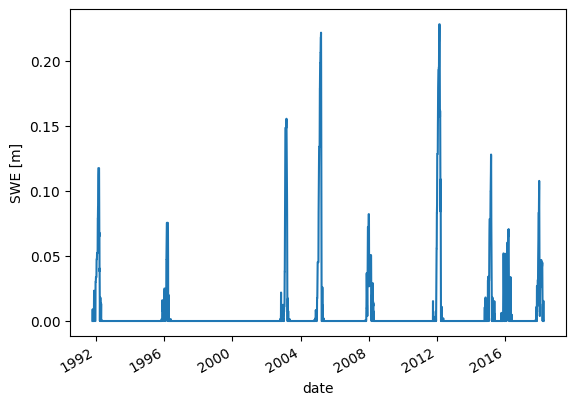

In [34]:
# swe = create_swe(n_years=3)
swe['swe'].plot(ylabel='SWE [m]')
plt.show()


In [35]:
# swe['swe']

In [36]:
hs = jopack.convert_1d(swe['swe'], swe_input_unit='m', hs_output_unit='m')
hs

date
1991-10-18    0.000000
1991-10-19    0.104838
1991-10-20    0.085807
1991-10-21    0.061099
1991-10-22    0.000000
                ...   
2018-03-31    0.088709
2018-04-01    0.163335
2018-04-02    0.136857
2018-04-03    0.054115
2018-04-04    0.000000
Length: 1358, dtype: float64

In [37]:
# hs validation/score model

from sklearn.metrics import r2_score
r2_score(swe['hsm'], hs)

0.9482489310493843

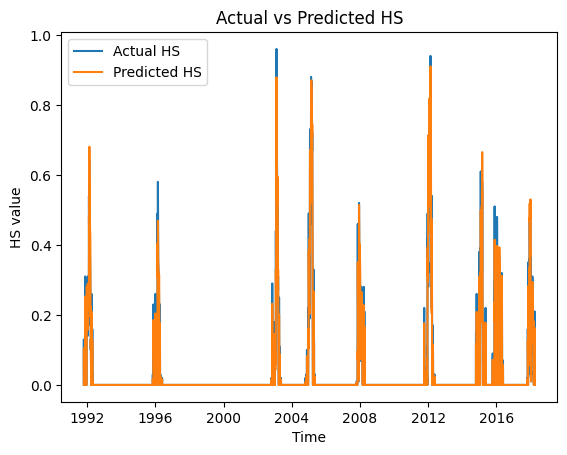

In [45]:

plt.figure()
plt.plot(swe['hsm'], label='Actual HS')
plt.plot(hs, label='Predicted HS')

plt.xlabel('Time')
plt.ylabel('HS value')
plt.title('Actual vs Predicted HS')
plt.legend()
plt.show()


In [83]:
hs.max

<bound method Series.max of date
1991-10-18    0.000000
1991-10-19    0.104838
1991-10-20    0.085807
1991-10-21    0.061099
1991-10-22    0.000000
                ...   
2018-03-31    0.088709
2018-04-01    0.163335
2018-04-02    0.136857
2018-04-03    0.054115
2018-04-04    0.000000
Length: 1358, dtype: float64>

In [76]:
df['date'].index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357],
      dtype='int64', length=1358)

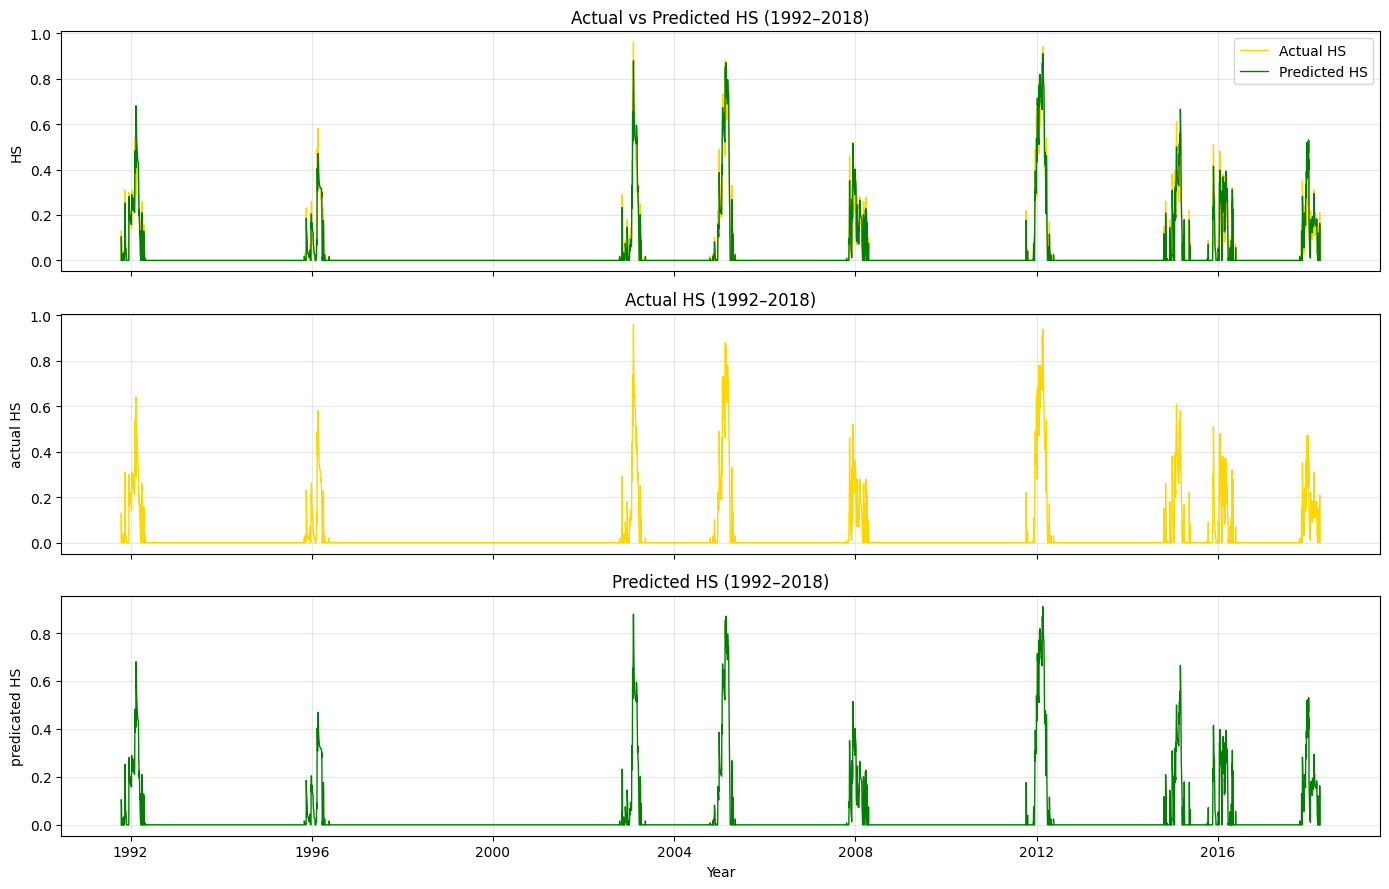

In [84]:
import matplotlib.pyplot as plt

time = df['date']

fig, axes = plt.subplots(3, 1, figsize=(14, 9), sharex=True)

# 1️⃣ Actual vs Predicted
axes[0].plot(time, swe['hsm'], label='Actual HS', color='gold', linewidth=1)
axes[0].plot(time, hs, label='Predicted HS', color='green', linewidth=1)
axes[0].set_title('Actual vs Predicted HS (1992–2018)')
axes[0].set_ylabel('HS')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2️⃣ Actual only
axes[1].plot(time, swe['hsm'], color='gold', linewidth=1)
axes[1].set_title('Actual HS (1992–2018)')
axes[1].set_ylabel('actual HS')
axes[1].grid(True, alpha=0.3)

# 3️⃣ Predicted only
axes[2].plot(time, hs, color='green', linewidth=1)
axes[2].set_title('Predicted HS (1992–2018)')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('predicated HS')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


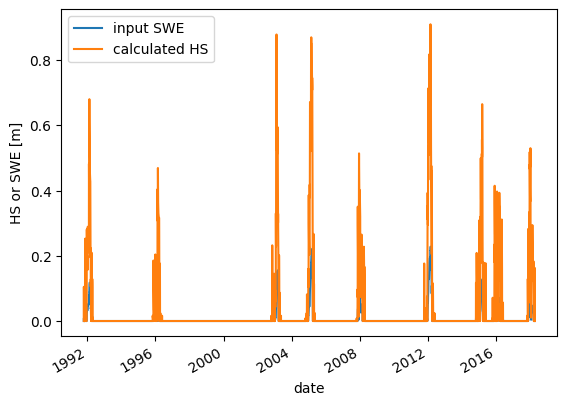

In [38]:
fig, ax = plt.subplots()
swe['swe'].plot(label='input SWE')
hs.plot(label='calculated HS')
ax.legend()
ax.set_ylabel('HS or SWE [m]')
plt.show()


In [39]:
# swe_two_years = create_swe(n_years=2)


In [40]:
hs_with_layers = jopack.convert_1d(swe['swe'], return_layers=True)
hs_with_layers


<xarray.Dataset> Size: 4MB
Dimensions:              (time: 1358, layers: 124)
Coordinates:
  * time                 (time) datetime64[ns] 11kB 1991-10-18 ... 2018-04-04
  * layers               (layers) int64 992B 0 1 2 3 4 5 ... 119 120 121 122 123
Data variables:
    hs                   (time) float64 11kB 0.0 0.1048 0.08581 ... 0.05412 0.0
    layer_heights        (layers, time) float64 1MB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    layer_densities      (layers, time) float64 1MB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    layer_max_densities  (layers, time) float64 1MB 0.0 0.0 0.0 ... 0.0 0.0 0.0

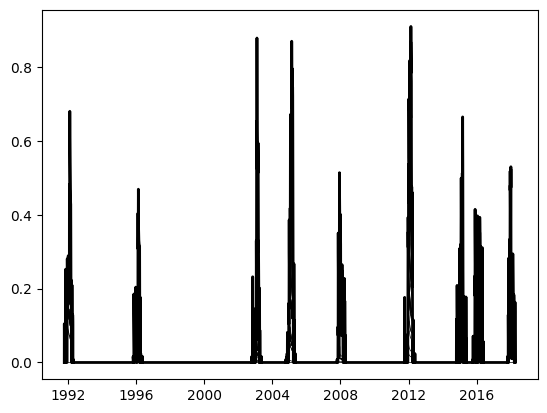

In [41]:
fig, ax = plt.subplots()
jopack.visualization.layer_plot(
    ax,
    hs_with_layers,
    color_variable=None,
)
plt.show()


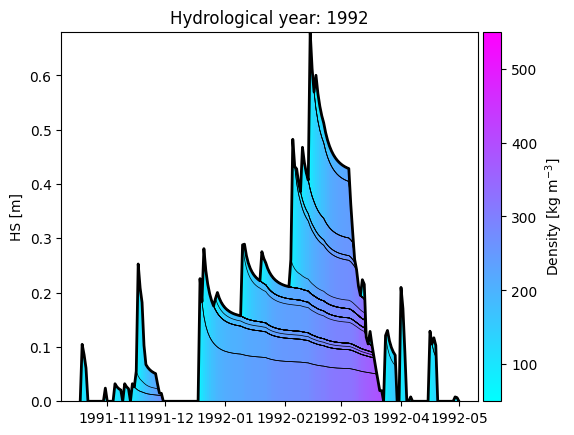

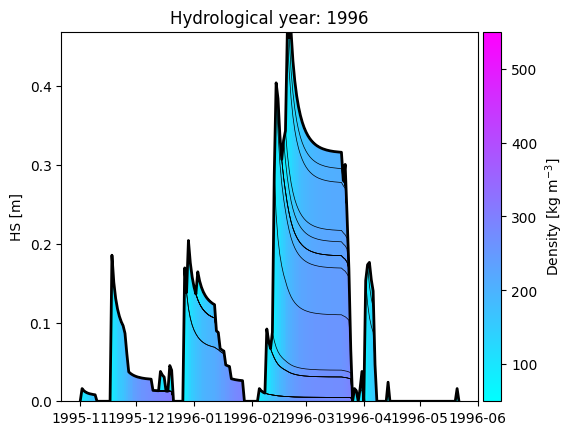

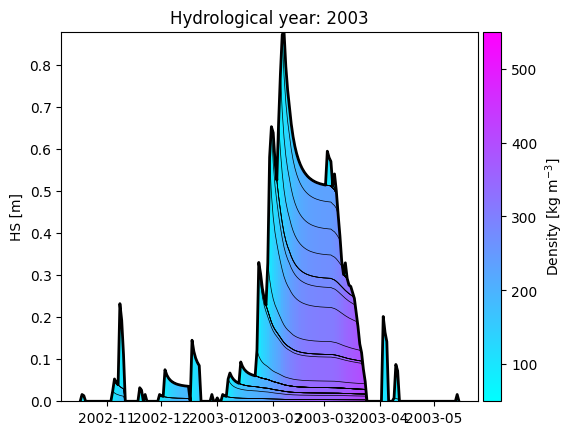

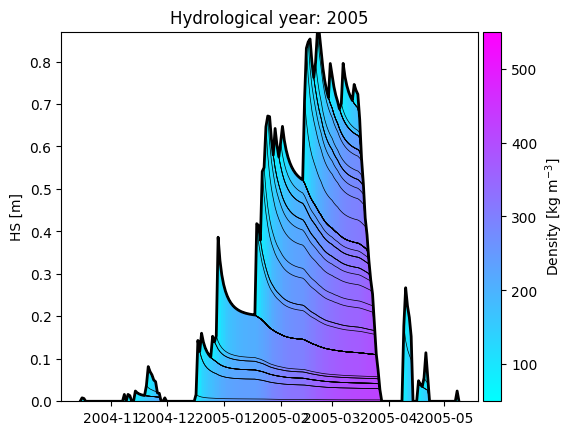

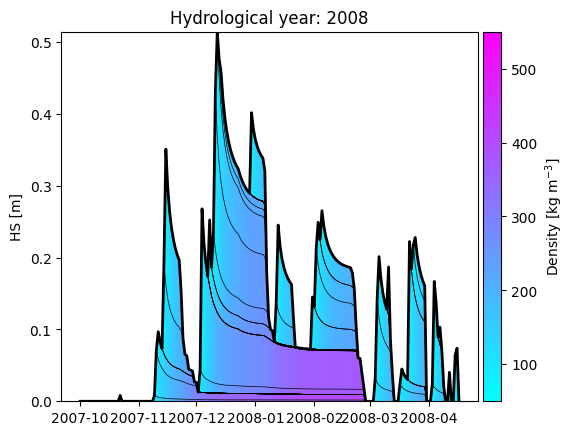

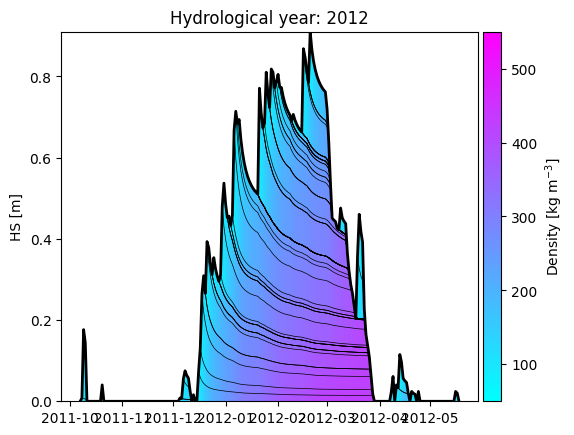

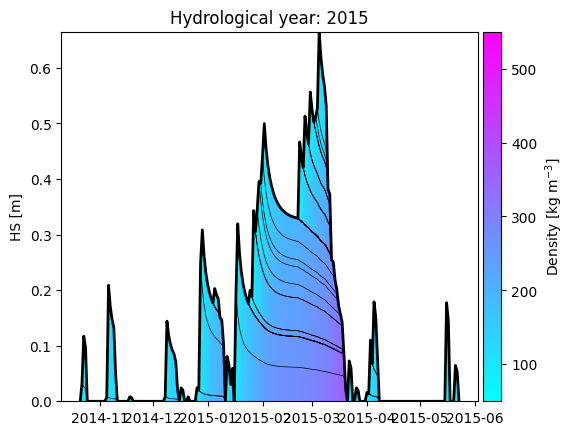

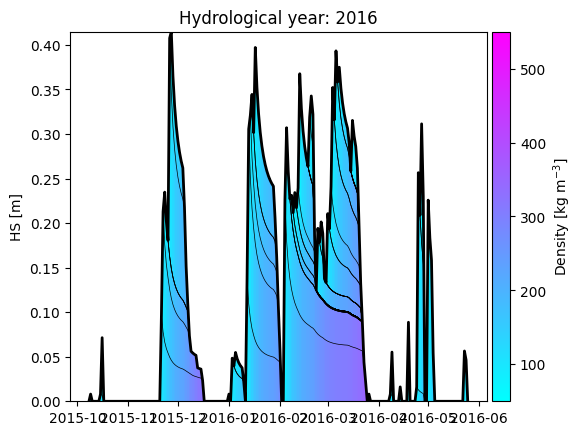

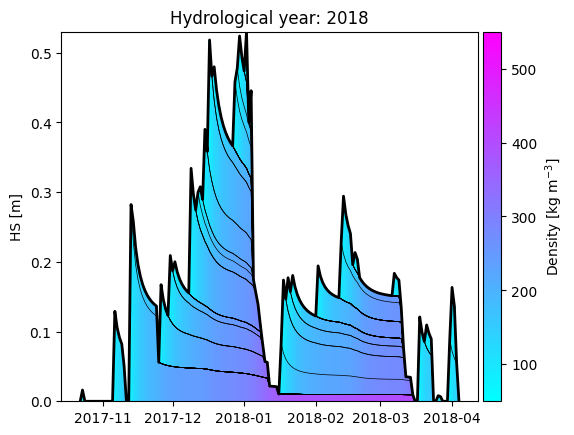

In [42]:
grouped_hydro_years = jopack.visualization.groupby_hydroyear(
    hs_with_layers,
    split=9,
)

for year, yearly_data in grouped_hydro_years:
    fig, ax = plt.subplots()
    jopack.visualization.layer_plot(
        ax,
        yearly_data,
        color_variable='layer_densities',
        cbar_label='Density [kg m$^{-3}$]'
    )
    ax.set_ylabel('HS [m]')
    ax.set_title(f'Hydrological year: {year}')
    plt.show()


In [43]:
df_1991 = df_ts.loc['1991']
hs_1991 = jopack.convert_1d(df_1991['swe'], swe_input_unit='m', hs_output_unit='m')
hs_1991


date
1991-10-18    0.000000
1991-10-19    0.104838
1991-10-20    0.085807
1991-10-21    0.061099
1991-10-22    0.000000
1991-10-30    0.000000
1991-10-31    0.024193
1991-11-01    0.000000
1991-11-04    0.000000
1991-11-05    0.032258
1991-11-06    0.026523
1991-11-07    0.023060
1991-11-08    0.020769
1991-11-09    0.000000
1991-11-10    0.032258
1991-11-11    0.026523
1991-11-12    0.023060
1991-11-13    0.000000
1991-11-14    0.032258
1991-11-15    0.026523
1991-11-16    0.055487
1991-11-17    0.252741
1991-11-18    0.208607
1991-11-19    0.182004
1991-11-20    0.102877
1991-11-21    0.067575
1991-11-22    0.062019
1991-11-23    0.058003
1991-11-24    0.055002
1991-11-25    0.052702
1991-11-26    0.050906
1991-11-27    0.032089
1991-11-28    0.015059
1991-11-29    0.014574
1991-11-30    0.000000
1991-12-18    0.000000
1991-12-19    0.225804
1991-12-20    0.183430
1991-12-21    0.280990
1991-12-22    0.240837
1991-12-23    0.215288
1991-12-24    0.197743
1991-12-25    0.185084
1991-1

In [44]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

MAE=mean_absolute_error(hs_1991,df_1991['hsm'])
MSE=mean_squared_error(hs_1991,df_1991['hsm'])
R2=r2_score(hs_1991,df_1991['hsm'])

print(MAE,MSE,R2)

print('RMSE', MSE**(1/2) )

0.018602611417337784 0.0007913041728828544 0.893313792797674
RMSE 0.028130129272416336
